## Final Project Submission

Please fill out:
* Student name: Deztany Jackson
* Student pace: self paced 
* Scheduled project review date/time: Friday Jan 6, 2022 11AM
* Instructor name:  Morgan Jones
* Blog post URL: http://dmvinedata.com/blog/


## Home Improvement House Predictions

### Authors: Deztany Jackson

# Business Understanding

## Overview

Real Estate agents in King County, Seattle are evaluating the neighborhoods to encourage home owners of he benefits of improving and upgrading their property value. Housing data from King County was used to develop linear regressions models to support future price prediction.  

The primary stakeholders are real estate agents because of their wide use cases, network, domain knowledge and their incentive for home owners to increase their property value. They can also use this for getting a jump start on  marketing to potential home buyers. The same predictions could be useful for the homeowners, potential buyers and even those in the remodeling and construction business. Because of their connection and  real estate agents are able to influence a larger community's property value which as greater impact than convinving individual homeowners. 
The area attracts new implants from tech jobs. A great number of these people (as singles or families) may be looking to buy or rent.

This model is used as an intial model supportingmedium course predictions.
The main attributes used to support model prediciton are: Condition and Grade.
The main attributes used to support model creation:
  I would not garuntee the price predicions are 100%
accurate.  
The model used accounts for 67% variability. This means there are things that the model still doesn account for 
in making predictions. 

 [Phase 1 Project Description](https://learning.flatironschool.com/courses/4964/pages/phase-2-project-description), 2022

# Data Understanding

This project uses the King County House Sales dataset (from GitHub project repo). This can be found in several locations: [Git Hub Data](https://github.com/learn-co-curriculum/dsc-phase-2-project-v2-3/tree/main/data) & [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). 

It is in the format of csv. The initial data used in the modeling will start with 20 of possible attributes. As modeling progressing certain attributes (features) will be processed, transformed and possibly removed.


In [1]:
#Imports necessary intial libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Allowing for tables to have longer scroll capability
pd.set_option('display.max_rows', 500)

The imported data is the entire initial dataset. This will be scope down before the intial understanding to support the the core modeling needs


In [2]:
#Import of data to explore, make the id the index column
df = pd.read_csv('data/kc_house_data.csv', index_col=0)
#displaying the intial top five
df.head() 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Describes the columns(features) and types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

---

The start of the intial dataset used for the modeling. Certain features will be removed before the data understanding and analysis begins. This is an initial scoping to simplifying modeling only, no statstical or other reason.

In [4]:
#Ignore these column at a minimum level Write assumption from the beginning data
#Ignore data, view, sqft_above, sqft_basement, yr_renovated,lat ,long ,sqft_living15, sqft_lot15

# The new dataset without the extra attributes. Use copy to keep old dataset intact.
kc_df = df.copy()

#Columns to drop
drop_col = ["date","view", "sqft_above", "sqft_basement", "yr_renovated","lat" ,"long" ,"sqft_living15", "sqft_lot15"]
kc_df = kc_df.drop(drop_col, axis = 1)
kc_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074


Looking at the dataset to see the size, any null values and the data types of the original dataset we will work with

In [5]:
#Viewing information about new dataset. Keep an eye on features with null values.
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


Using check to check size of dataset, rows and columns.  Columns are a key to track of through data preparation.

In [6]:
#Check size of the data set
kc_df.shape

(21597, 11)

The following features are all numerical and categorical. The describe function only gives out for numerical numbers, not categorical (objects). The features of "yr_built", "bathroom", "bedroom" and "zipcode" are nominal numbers and used to classify and count values.  The rest are numerical cardinal values. The names of the features are generally self explanatory and will stay the same.

Ref: [Numerical Numbers, Rod Pierce](https://www.mathsisfun.com/numbers/cardinal-ordinal-nominal.html)

In [7]:
# Numerical descriptions and statistics
kc_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,98199.000000


### Initial Features Used
- **King County Table**
    - Rows: 21597 
    - Features: 11
    * "id" is not a feature used in the modeling
    
##### Cardinal Numbers

- ***price - (Target Variable)***
    - Description:
    - Expectation/Comment:
- **bedrooms**
    - Description:
    - Expectation/Comment:
- **bathrooms**
    - Description:
    - Expectation/Comment:
- **sqft_living**
    - Description:
    - Expectation/Comment:
- **sqft_lot**
    - Description:
    - Expectation/Comment:
- **floors**
    - Description:
    - Expectation/Comment: 
    
##### Nominal Numbers

- **yr_built**
    - Description:
    - Expectation/Comment:

- **zipcode**
    - Description:
    - Expectation/Comment:
    
##### Categorical Objects
- **waterfront**
    - Description:
    - Expectation/Comment:
- **condition**
    - Description:
    - Expectation/Comment:
- **grade**
    - Description:
    - Expectation/Comment:

Viewing and counting the values of the categorical features.  We can assess what the best route to work with these is. Do we change to ordinal numbers or process this in the future using techniques like One Hot Encoding? For the "condition" and "grade" features  One Hot Encoding will be used.  

---

A broad view of the distribution of the features help understand the possible transformation needs of the data. Looking to see if the data is linear and/or normal distributed. From the looks the sqft_living looks the most linear against price. Most of the data is skewed and not normally distributed. Log-transformation and normalization should help the continous data during the modeling.

In [ ]:
#Pair plot for quick view of the datasets distribution and linearity
sns.pairplot(kc_df)


Looking further into the categorical data, to assess future processing needs.

In [ ]:
#Viewing the values and their count for a feature
kc_df[["condition"]].value_counts()

Using the "Column Names" file description and [King County Clossary, Building Conditions](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) the string and values mapping was found and used. Even though OHE can be performed on the string values in the future. Having numbers allows for easier data processing and manipulation (on new data or modified test data) for predicitons.

In [8]:
#Creating a dictionary to map to the string values for condition
cond_num = {'Very Good':5, "Good": 4,'Average': 3, "Fair": 2, "Poor": 1}


In [9]:
#Applying the dictionary to map to the values of the ori
kc_df["cond_num"] = kc_df["condition"].map(cond_num)


In [10]:
kc_df[["cond_num"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   cond_num  21597 non-null  int64
dtypes: int64(1)
memory usage: 337.5 KB


In [11]:
kc_df[["cond_num","condition"]].value_counts()

cond_num  condition
3         Average      14020
4         Good          5677
5         Very Good     1701
2         Fair           170
1         Poor            29
dtype: int64

In [12]:
#Viewing the values and their count for a feature
kc_df[["grade"]].value_counts()

grade        
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
dtype: int64

In [13]:
grade_num = {'13 Mansion':13, "12 Luxury": 12,'11 Excellent': 11,
             "10 Very Good": 10,"9 Better": 9,"8 Good": 8,
             "7 Average": 7,"6 Low Average": 6, "5 Fair": 5,
             "4 Low": 4, "3 Poor": 3}

In [14]:
kc_df["grade_num"] = kc_df["grade"].map(grade_num)

In [15]:
kc_df[["grade_num","grade"]].value_counts()

grade_num  grade        
7          7 Average        8974
8          8 Good           6065
9          9 Better         2615
6          6 Low Average    2038
10         10 Very Good     1134
11         11 Excellent      399
5          5 Fair            242
12         12 Luxury          89
4          4 Low              27
13         13 Mansion         13
3          3 Poor              1
dtype: int64

The "waterfront" feature is the only feature that has "NaN". These values will be imputed with a value of "Unknown" than deleted or imputed with "No". The Null values make up over ~10% of the data set. This could impact training of the model adversly because the limited data. Less than 1% of the known homes have a waterfront view
"No" may seem like a conservative choice to inpute, but using "Unknown" allows future data exploration if more information becomes available.

In [16]:
kc_df[["waterfront"]].isna().value_counts()

waterfront
False         19221
True           2376
dtype: int64

In [17]:
kc_df[["waterfront"]].value_counts()

waterfront
NO            19075
YES             146
dtype: int64

If waterfront becomes a main feature it is good to understand which home types the Null is associated with.
It seems the "average"  and "good" grade home are traced to much of the Null values.  If they have space for home repair, having a more accurate
value of "waterfront" could turn out helpful for real estate agents to market.

In [18]:
#Checking to see which house types these Null values affect
kc_df[kc_df["waterfront"].isna()]["grade"].value_counts()

7 Average        1000
8 Good            656
9 Better          295
6 Low Average     228
10 Very Good      116
11 Excellent       42
5 Fair             30
12 Luxury           7
4 Low               2
Name: grade, dtype: int64

# Data Preparation

Data preparation happens throughout the modeling process in iteration as new information is known.
There will be some preparation (e.g.data transformation and scaling) that will happen as we split the training and test
data from one another.  This is to protect against data leakage.

In [19]:
#Remove the duplicate rows from data set
kc_df = kc_df.drop_duplicates()
print (kc_df.duplicated().sum(),kc_df.value_counts().sum())

0 19214


Usually it is better to fill in "NaN" after train and test split to prevent data leakage.  
Because filling in unknown as no effect on the other features, decided to do it before.

Dropping the original columns of condition and grade.  This is essentially duplicate information as the cond_num and grade_num.


In [20]:
#drop the original condition and grade columns
kc_df = kc_df.drop(["condition","grade"], axis = 1)
kc_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,cond_num,grade_num
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,1955,98178,3,7
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,1951,98125,3,7
5631500400,180000.0,2,1.00,770,10000,1.0,NO,1933,98028,3,6
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,1965,98136,5,7
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,1987,98074,3,8


In [21]:
#Replaces "NaN" with "Unk"
kc_df["waterfront"].fillna("Unk", inplace = True)

#Check NaN Count after replacing "NaN"with "Unk"
print("Values: ",kc_df[["waterfront"]].value_counts())

print("Waterfront Null Values:", kc_df[["waterfront"]].isna().sum())

Values:  waterfront
NO            19068
Unk            2376
YES             146
dtype: int64
Waterfront Null Values: waterfront    0
dtype: int64


### Cross Validation Approach

Splitting the data training data a 80/20. The train/test split is used for intial model validation. Kfold cross validation will also be used.  This allows the dataset to be split into "rain" and "test" and then when the training data is used with cross validation it will be split into "training" and "validation" data. 

The target value is the "price" value.  This will be set to "y" and the rest of the data will be in "X". This is then used to do the initial train/test split.

In [22]:
# Importing library to split the data into training and test data for model validation. 
from sklearn.model_selection import train_test_split

#dropping the target variable from the dataset features
X = kc_df.drop("price", axis=1)
# Setting the target variable
y = kc_df["price"]

#Setting the test size .
test_size = .2

#Using the basic train/test split. Adding a random state to product the random set each time.
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= test_size, random_state=42)

In [23]:
#Looking at the split
print(X_train.shape , X_test.shape, y_train.shape, y_test.shape)

(17272, 10) (4318, 10) (17272,) (4318,)


Visualization of target variable: 
[Ref: Linear Reg Lab, #20](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution) 
Most of the housing prices are are less than 1 million dollars.

(0.0, 5000000.0)

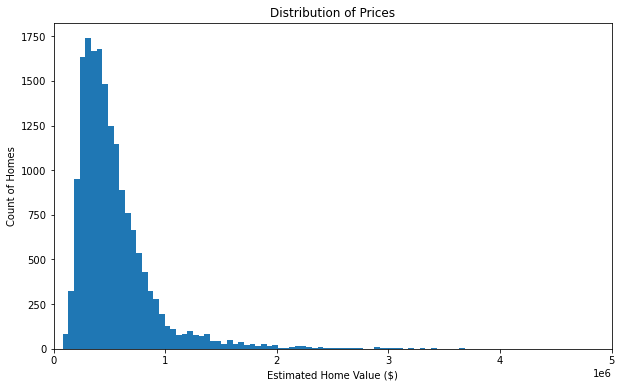

In [24]:
#Setting the frame and figsize
fig, ax = plt.subplots(figsize=(10, 6))


#Plotting the training portion of the target variables
ax.hist(y_train, bins=150)

#Setting labels and titles
ax.set_xlabel("Estimated Home Value ($)")
ax.set_ylabel("Count of Homes")
ax.set_title("Distribution of Prices")

#Setting limit on the x axis
plt.xlim([0, 5000000])

The target variable in the training data set is positively skewed. A log transformation may support this model effort and normalize the target variables.

In [25]:
#Looking at the distribution of the price
y_train.describe()

count    1.727200e+04
mean     5.415971e+05
std      3.646503e+05
min      8.000000e+04
25%      3.230000e+05
50%      4.520000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [26]:
#Reviewing the y test "price" stats
y_test.describe()

count    4.318000e+03
mean     5.351554e+05
std      3.782946e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.450000e+05
75%      6.394875e+05
max      7.060000e+06
Name: price, dtype: float64

Reviewing the statistics on the y_train and y_test value for current understanding and future comparison

# Baseline Model (1)


###  Initial Correlation

The initial linear regression model will be done with the most correlated feature. This will be considered our
baseline model.  From here we will do several iterations to see if we can improve the model's performance with different techniques.

Check for the highest correlated values to the target variable "price". 
Correlation works on numerical values, not categorical ones.


In [27]:
#Print out correlation values in dataframe
#This is done with the "price" value in the dataset.
corr = kc_df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode,cond_num,grade_num
price,1.000000,0.308835,0.525933,0.701938,0.089868,0.256948,0.054015,-0.053381,0.036039,0.668077
bedrooms,0.308835,1.000000,0.514567,0.578211,0.032448,0.178196,0.155831,-0.154143,0.026450,0.356788
bathrooms,0.525933,0.514567,1.000000,0.755813,0.088396,0.502788,0.507247,-0.204782,-0.126446,0.665881
sqft_living,0.701938,0.578211,0.755813,1.000000,0.173423,0.354350,0.318431,-0.199751,-0.059526,0.763031
sqft_lot,0.089868,0.032448,0.088396,0.173423,1.000000,-0.004664,0.053100,-0.129583,-0.008894,0.114826
floors,0.256948,0.178196,0.502788,0.354350,-0.004664,1.000000,0.488904,-0.059711,-0.263915,0.458705
yr_built,0.054015,0.155831,0.507247,0.318431,0.053100,0.488904,1.000000,-0.347430,-0.361447,0.447723
zipcode,-0.053381,-0.154143,-0.204782,-0.199751,-0.129583,-0.059711,-0.347430,1.000000,0.002910,-0.185850
cond_num,0.036039,0.026450,-0.126446,-0.059526,-0.008894,-0.263915,-0.361447,0.002910,1.000000,-0.146765
grade_num,0.668077,0.356788,0.665881,0.763031,0.114826,0.458705,0.447723,-0.185850,-0.146765,1.000000


The most correlated is the sqft_living with (.7), the least is the zipcode with (-.05). Below this correlation table will be visualized in a heatmap.

Heatmap: [Ref: Phase 2, #20 Linear Reg Lab](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution) 

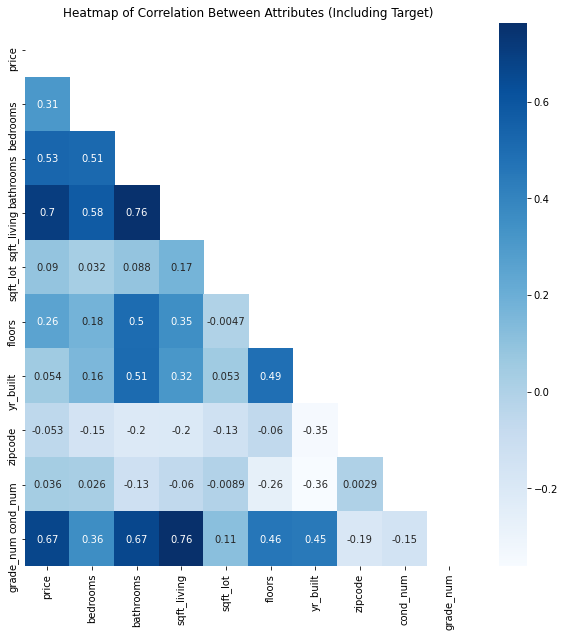

In [28]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    #Color of the heatmap
    cmap="Blues",
    # Specifies that we want labels, not just colors
    annot=True,
    
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

The "sqft_living" feature has the highest correlation of .7 with the "price". "The zipcode" feature has a negative correlation value. "Bathrooms" and "sqft_living are highly correlated as well. These correlations are the only ones above .7. This dataset doesn't have a really high correlation with the "price" feature or with each other.


---

Below we will plot the most correlated feature against price.  This will let us see if this distribution is linear for our baseline model.

In [29]:
#Strongest numerical feature from the heatmap
most_correlated_feature = "sqft_living"

(150.0, 7500.0)

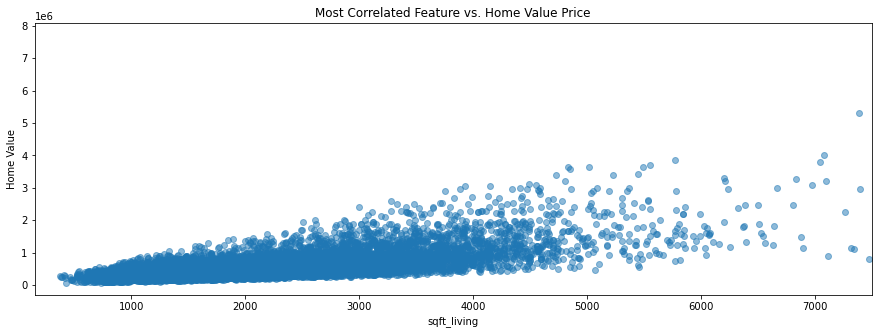

In [30]:
#Plot a scatter plot "Most Correlated Feature vs. Home Value"
fig, ax = plt.subplots(figsize = (15,5))

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("Home Value")
ax.set_title("Most Correlated Feature vs. Home Value Price");
plt.xlim([150, 7500])

The graph shows a fairly linear data plot. The larger the sqft gets with the increase of price
the more outliers arise.

### Baseline Model - Basic Train/Test Split 

Modeling the baseline feature using the basic train/test split first then a kfold validation method.


Modeling using linear regression approach. This looks at the relationship between dependent (y) and independent (x) values.
- The "fit" method learns something about the data.
- The "transform" method uses what it learned to transform the data.

The train and test data are separated but, the same process needs to be applied on each. 
* During processing fitting the data is done on the training data to learn and applied on the testing data using transform

In [31]:
#Reshaping from a 1D series to A multidimensional array that the transformers support

#Reshape training data to support modeling without error
X_train[most_correlated_feature]
X_array = np.array(X_train[most_correlated_feature])
newarr = X_array.reshape(-1,1)

#Reshape the test data to support modeling without error for single arrays
X_test[most_correlated_feature]
X_array_test = np.array(X_test[most_correlated_feature])
newarr_test = X_array_test.reshape(-1,1)

In [32]:
#Showing the data pro and post reshaping
print(X_train[most_correlated_feature].shape,newarr.shape)

(17272,) (17272, 1)


In [33]:
#Importin Linear Regression library
from sklearn.linear_model import LinearRegression

#Initializing model
linreg = LinearRegression()
#Fitting training data
linreg.fit(newarr, y_train)
linreg.fit(newarr_test, y_test)
LinearRegression()

LinearRegression()

In [34]:
#Importing library to look at erros
from sklearn.metrics import mean_squared_error

#Y price Predictions for training and testing features
y_hat_train = linreg.predict(newarr)
y_hat_test = linreg.predict(newarr_test)

#Root Mean Square Error
train_rmse = mean_squared_error(y_train, y_hat_train, squared = False)
test_rmse = mean_squared_error(y_test, y_hat_test, squared = False)

#r2 Score
Model_train_score = linreg.score(newarr,y_train)
Model_score = linreg.score(newarr_test,y_test)

print('Train RMSE ', train_rmse)
print('Test RMSE: ', test_rmse)
print()
print('Train Model Score: ', Model_train_score)
print('Test Model Score: ', Model_score)


Train RMSE  260172.0361161922
Test RMSE:  268864.35998011974

Train Model Score:  0.49091149233831743
Test Model Score:  0.494749423259338


The test RMSE is currently high and worse than the training Error. They both are far from 0. The model will not generalize well for future test data.
Unclear the reason, may be irrudicle noise. Will look into applying log transforming the dataset to see. 
The base model score R2 is only .49. This base mode isn't strong enough to support predicting prices. This tells us how we the model is at predicting the variance in dataset.  There may be better features or a combination of a few that hopefully will increase the score.

### Baseline Model- Kfold Validation

The original dataset is split into "train" and "test".   We are applying the kfold validation to our training set which splits the training dataset into "train and "validation". The amount of splits is set in the cv. The Kfold score will be a mean of the various splits.


In [35]:
#Importing cross validate and shuffle split.
#Shuffle split creates different values for splits and test size
from sklearn.model_selection import cross_validate, ShuffleSplit

#Splitting the dataset twith a .3 test size
splitter = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

#Initalize as used estimator
baseline_model = LinearRegression(normalize= True)

#Baseline scores using kfold cross validation
#Most correlated feature - sqft_living
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)


#Mean of the train and validation scores
print("Baseline Models:")
print("Current Kfold Train mean score:     ", baseline_scores["train_score"].mean())
print("Current Kfold Validation mean score:", baseline_scores["test_score"].mean())
print()
#Training and validation Scores
print('Previous Train/Test Split Train Model Score: ' ,Model_train_score)
print('Previous Train/Test Split Validation Model Score: ', Model_score)

Baseline Models:
Current Kfold Train mean score:      0.4884772214299433
Current Kfold Validation mean score: 0.5000072841051805

Previous Train/Test Split Train Model Score:  0.49091149233831743
Previous Train/Test Split Validation Model Score:  0.494749423259338


The Kfold method offers a higher validation mean score (.50) than the previous Train/Test score.  Both offer a higher score than their associated training score. 

# Second Model with Categories and Numerical Features (2)

We will improve the baseline model by adding more features training more features(numerical and categorical). More processing of the data will occur across the training and testing data to support an improved model.

In [36]:
#Viewing the current columns in the dataset to use
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'yr_built', 'zipcode', 'cond_num', 'grade_num'],
      dtype='object')

In [53]:
#Specify the groups of features in list for specific plotting uses
#sqft_living was plot above, therfore it is not in this numerical list

numerical = ['bedrooms','sqft_lot','floors',"bathrooms","yr_built",  "zipcode"]
categoricals = ['waterfront']

Linear Reg Code Ref: [Phase 2, Topic 20 Linear Reg Lab](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution)


Plotting scatter plots to look which features would need further processing and transformaiton.

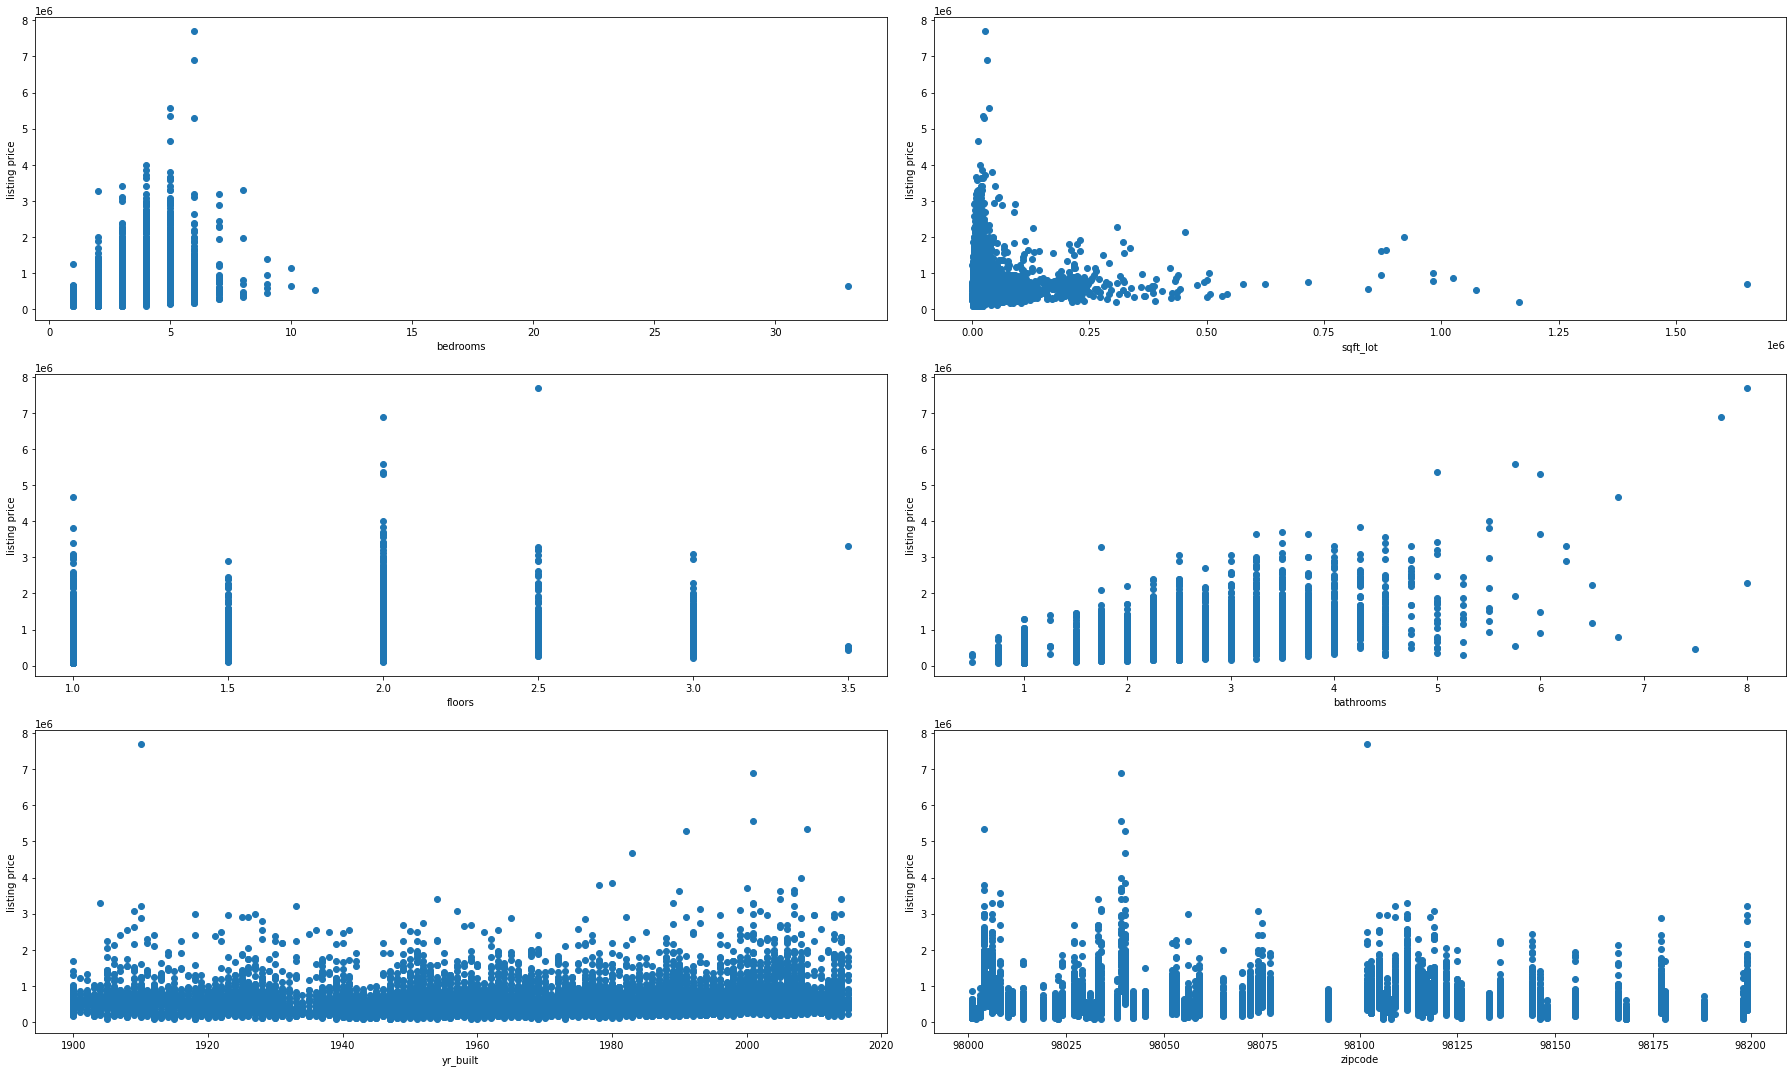

In [54]:
#Plotting scatter plots of numerical values exept sqft_living
X_train_plot = X_train[numerical]

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(25, 15))
fig.set_tight_layout(True)

for ide, c in enumerate(X_train_plot.columns):
    ax = axes[ide//2][ide%2]
    ax.scatter(X_train_plot[c], y_train)
    ax.set_xlabel(c)
    ax.set_ylabel("listing price")
    

Checking for assumptions of model for all the  numerical features . 

From the continous features sqft_living is the most linear, but skewed. The other skewed continous features is the sqft_lot.

Log transformations and stardardization will be performed on the sqft_living and sqft_lot because of their skewness.
 We will treat bathrooms,bedrooms, floors, zipcode and yr_built as discrete variables and
 
"A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values." Ref: [Phase 2 Module 20, Feature Scaling and Norm](https://github.com/learn-co-curriculum/dsc-feature-scaling-and-normalization-lab/tree/solution)

The least correlated feature is the zipcode. We wll drop it from the featureset before we train with more features.  It will probably be useful in scoping the areas to focus on in making predictions.

---

## Data processing and transformation

Explain what is going on

The  process of transforming the features. 
Ref Naming Categories after OHE: [Codementor](https://www.codementor.io/@abdelfettahbesbes/one-hot-encoding-in-data-science-1pe0lftu21)

In [55]:
#Setting column names for one hot encoded variables 
categoricals
cat_cols_encoded = []
for col in categoricals:
    cat_cols_encoded += [f"{col[0:2]}_{cat}" for cat in list(X[col].unique())]


In [172]:
cat_cols_encoded

['wa_Unk', 'wa_NO', 'wa_YES']

Reminder, only some of the features will be transformed based on their type.

In [189]:
#Creating a list of the features to transform

#Features going through log-transformaiton
log_feat = ["sqft_lot", "sqft_living"]
#Features that will not be transformed
discrete_col= ["bathrooms","bedrooms","yr_built","zipcode","floors", "cond_num", "grade_num"]
#OHE features
categoricals = ['waterfront']


In [190]:
#Reshape Y training data to support modeling without error for single arrays

Y_array_train = np.array(y_train)
y_trainarr = Y_array_train.reshape(-1,1)

#Reshape the test data to support modeling without error for single arrays
Y_array_test = np.array(y_test)
y_testarr = Y_array_test.reshape(-1,1)

The below code fits and transforms the data. The datasets are then coFitting and transforming data
Explain X 
Explain Y
eXPLAIN different data sets and why they are being applied.

In [200]:
#  import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
log_transformer_y = FunctionTransformer(np.log, validate=True)
# OHE instantiation. Will drop a value after the concatenation
ohe = OneHotEncoder(sparse=False) 

#Fitting data
#log_feat = ["sqft_lot", "sqft_living"]
log_transformer.fit(X_train[log_feat])
#categoricals = ['waterfront', 'condition', 'grade']
ohe.fit(X_train[categoricals])
log_transformer_y.fit(y_testarr  )

#Train Transformations
X_train_log = log_transformer.transform(X_train[log_feat])
X_train_ohe = ohe.transform(X_train[categoricals])
y_train_log = log_transformer_y.transform(y_trainarr)

#Test Transformation
X_test_log = log_transformer.transform(X_test[log_feat])
X_test_ohe = ohe.transform(X_test[categoricals])
y_test_log = log_transformer_y.transform(y_testarr)


#Concatenate transformed train data. Keeping the same index as the original training data

X_train_sec = pd.concat([
        pd.DataFrame(X_train_log, columns= log_feat, index=X_train.index),
        pd.DataFrame(X_train[discrete_col], columns= discrete_col, index=X_train.index),
        pd.DataFrame(X_train_ohe, columns = cat_cols_encoded, index=X_train.index)
        ], axis=1)

#Concatenate transformed test data
X_test_sec = pd.concat([
        pd.DataFrame(X_test_log, columns=log_feat, index=X_test.index),
        pd.DataFrame(X_test[discrete_col], columns= discrete_col, index=X_test.index),
        pd.DataFrame(X_test_ohe, columns = cat_cols_encoded, index=X_test.index)
        
    ], axis=1)

#Converting the original y log array to a series with the original shape and an index
y_train_log = pd.Series(data=y_train_log.reshape((y_train.shape)), index=X_train.index)
y_test_log = pd.Series(data=y_test_log.reshape((y_test.shape)), index=X_test.index)


In [192]:
#checking data shapes Columns added after OHE
print( X_train_sec.shape,X_test_sec.shape)

(17272, 12) (4318, 12)


In [193]:
X_test_sec.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
       'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_Unk', 'wa_NO',
       'wa_YES'],
      dtype='object')

In [194]:
#Drop the first col of each ohe CAT to reduce multicollinarity
X_train_sec= X_train_sec.drop(['wa_Unk'], axis=1)
X_test_sec= X_test_sec.drop(['wa_Unk'], axis=1)

In [195]:
print( X_train_sec.shape,X_test_sec.shape)


(17272, 11) (4318, 11)


### Modling  with Cat and Numericals 

Modeling second model after transformations occurred. 

In [196]:
#Initializing model
linreg_sec = LinearRegression(normalize= True)

#Fitting training data
linreg_sec.fit(X_train_sec, y_train_log)
linreg_sec.fit(X_test_sec, y_test_log)
LinearRegression()

LinearRegression()

In [197]:
#Splitting the dataset in three sections with a .3 test size
splitter = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

#Modeling second model 
second_scores = cross_validate(
    estimator=linreg_sec,
    X=X_train_sec,
    y=y_train_log,
    return_train_score=True,
    cv=splitter
)

In [198]:
#Y price Predictions for training and testing features
y_hat_train_sec = linreg_sec.predict(X_train_sec)
y_hat_test_sec = linreg_sec.predict(X_test_sec)

#Root Mean Square Error (if squared is set to False)
train_rmse_sec = mean_squared_error(y_train_log, y_hat_train_sec, squared = False)
test_rmse_sec = mean_squared_error(y_test_log, y_hat_test_sec, squared = False)


In [66]:
#Print out of errors and scores for current and previous models

print('Current Train RMSE ', train_rmse_sec)
print('Current Test RMSE: ', test_rmse_sec)
print()
#Mean of the Current kfold validation scores
print("Current Model Kfold Train score:     ", second_scores["train_score"].mean())
print("Current Model Validation score:", second_scores["test_score"].mean())
print()
#Mean of the traing validation scores
print("Baseline Models:")
print("Previous Kfold Train mean score:     ", baseline_scores["train_score"].mean())
print("Previous Kfold Validation mean score:", baseline_scores["test_score"].mean())
print()
#Train and validation Scores
print('Previous Train/Test Split Train Model Score: ', Model_train_score)
print('Previous Train/Test Split Validation Model Score: ', Model_score)

Current Train RMSE  0.3148336380868248
Current Test RMSE:  0.30755351160737365

Current Model Kfold Train score:      0.6446907194384797
Current Model Validation score: 0.6414405396108452

Baseline Models:
Previous Kfold Train mean score:      0.4884772214299433
Previous Kfold Validation mean score: 0.5000072841051805

Previous Train/Test Split Train Model Score:  0.49091149233831743
Previous Train/Test Split Validation Model Score:  0.494749423259338


The current RMSE of the test data is less than that of the training data. This means the model is more generalized than before.  The values are still higher than 0, but have decrease.  

The current model has increase the R2 score for the validation model by ~(.14).  This means we increased 
the ability for our model to understand the variance in the model by 14%. The validation model is not better than the train model score, there might be a slight overfitting if we use this.
So far we will keep this current model and improve.

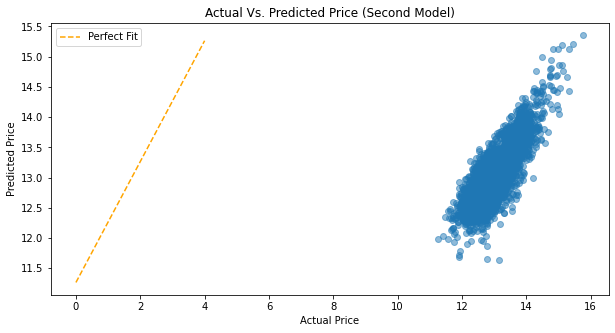

In [67]:
#plotting the linearity zoomed in
fig, ax = plt.subplots(figsize = (10,5))

perfect_line = np.arange(y_test_log.min(), y_test_log.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test_log, y_hat_test_sec, alpha=0.5)
ax.set_title("Actual Vs. Predicted Price (Second Model)")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
#plt.xlim([0, 2500000])
ax.legend();

The predicted data is being plotted for a perfect fitted line.  The graph shows linearity up until ~1 Million dollars,
but a high number of outliers after this point.


# Investigating Multicollinearity

Looking into further multicollinearity of the data.  We want the features to be independent. The less they are, the more they can alter the model's fit.

In [68]:
#Reviewing current columns in moel
X_train_sec.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
       'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_NO', 'wa_YES'],
      dtype='object')

In [69]:
#Using statsmodel to view statstics on the model
import statsmodels.api as sm

#Build model
stats_model = sm.OLS(y_train_log, sm.add_constant(X_train_sec)).fit()

#View model
stats_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2837.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:12:49   Log-Likelihood:                -4523.4
No. Observations:               17272   AIC:                             9071.
Df Residuals:                   17260   BIC:                             9164.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3025      5.076      0.060      0.952      -9.646      10.251
sqft_lot       -0.0397      0.003    -12.423      0.000      -0.046      -0.033
sqft_living     0.4395      0.012     36.579      0.000       0.416       0.463
bathrooms       0.0848      0.006     15.413      0.000       0.074       0.096
bedrooms       -0.0389      0.003    -11.436      0.000      -0.046      -0.032
yr_built       -0.0059      0.000    -52.006      0.000      -0.006      -0.006
zipcode         0.0002   5.08e-05      3.878      0.000    9.75e-05       0.000
floors          0.0450      0.006      7.626      0.000       0.033       0.057
cond_num        0.0370      0.004      9.129      0.000       0.029       0.045
grade_num       0.2348      0.003     70.474      0.000       0.228       0.241
wa_NO          -0.0053      0.008     -0.688      0.491      -0.020       0.010
wa_YES          0.5477      0.031     17.856      0.000       0.488       0.608
==============================================================================
Omnibus:                       75.352   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.717
Skew:                          -0.014   Prob(JB):                     1.82e-23
Kurtosis:                       3.380   Cond. No.                     2.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Which ones would should be eliminated based on p value? We are assuming alpha level (significance level) of .05.
If the p-value is above this, this let's us know we should reject these features. This is based on a hypothesis that these features are meaningful to the model.


Looks like there is a lot of multicolinearity in the model. The features that are above the needed p-value are: 
- **"co_Poor","wa_NO"** . 

We will run Recursive Feature Evaluation (RFE) to see if some of the same values are chosen

# Feature Recommendations with RFECV

In [70]:
#2nd iteration of the model with kfold instead of test split and RFECV Ref Linear Algebra Lab
from sklearn.feature_selection import RFECV
#Features must be scaled to be used
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)


X_train_for_RFECV = StandardScaler().fit_transform(X_train_sec)

#Initiate linear Refression model
model_for_RFECV = LinearRegression()


# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train_log)


# Print the results Ref: [Phase 2, Topic 20, Linear Regression Lab]
print("Non Recommended Features")
#Creates a fist for Reocmmended dropped columns
#The recommended dropped features will be False. If False, add to list RFECV_rec_drop_col = []
RFECV_rec_drop_col = []
for index, col in enumerate(X_train_sec.columns):
    if selector.support_[index] == False:
        print(f"{col}: {selector.support_[index]}")
        RFECV_rec_drop_col.append(col)

Non Recommended Features
wa_NO: False


In [ ]:
print("Rec P-value based drop: " "co_Poor","wa_NO" )
print("Rec RFECV based drop: ",  RFECV_rec_drop_col )

The RFECV method methods agrees on dropping all the same features as the p-value test in addition
to 'gr_9 Better'. On the next model all of the recommended features will be dropped. RFE was used on a dataset with 23 predictors, this may not have been a big help becasue of this.

In [71]:
#Checking current columns
X_train_sec.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
       'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_NO', 'wa_YES'],
      dtype='object')

In [72]:
#Dropping features from both training and test set separately
X_train_sec_drop = X_train_sec.drop( RFECV_rec_drop_col, axis =1)   
X_test_sec_drop = X_test_sec.drop( RFECV_rec_drop_col, axis =1)   

In [73]:
#Checking current shape
print( X_train_sec_drop.shape,X_test_sec_drop.shape)

(17272, 10) (4318, 10)


In [74]:
#Build with neew dataset 
model = sm.OLS(y_train_log, sm.add_constant(X_train_sec_drop)).fit()

#Model the stats model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     3120.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:13:35   Log-Likelihood:                -4523.7
No. Observations:               17272   AIC:                             9069.
Df Residuals:                   17261   BIC:                             9155.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3710      5.075      0.073      0.942      -9.576      10.318
sqft_lot       -0.0397      0.003    -12.424      0.000      -0.046      -0.033
sqft_living     0.4394      0.012     36.576      0.000       0.416       0.463
bathrooms       0.0848      0.006     15.413      0.000       0.074       0.096
bedrooms       -0.0389      0.003    -11.432      0.000      -0.046      -0.032
yr_built       -0.0059      0.000    -52.013      0.000      -0.006      -0.006
zipcode         0.0002   5.08e-05      3.865      0.000    9.68e-05       0.000
floors          0.0450      0.006      7.629      0.000       0.033       0.057
cond_num        0.0370      0.004      9.125      0.000       0.029       0.045
grade_num       0.2349      0.003     70.482      0.000       0.228       0.241
wa_YES          0.5483      0.031     17.883      0.000       0.488       0.608
==============================================================================
Omnibus:                       75.119   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.330
Skew:                          -0.014   Prob(JB):                     2.21e-23
Kurtosis:                       3.380   Cond. No.                     2.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Even though features were dropped, the model still suggests a high multicollinearity and the same  R2 score.  We will be using the model for 
predictions and not specifically inferences on the features and their impacts. We can ignore this for now and continue on.

# Best Features Model (3)

We will take the best features we have left and train the next model. The best features so far include 17 features:
- 'sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
- 'wa_YES', 'co_Good', 'co_Fair', 'gr_6 Low Average', 'gr_8 Good',
- 'gr_11 Excellent', 'gr_5 Fair', 'gr_10 Very Good', 'gr_12 Luxury',
- 'gr_4 Low', 'gr_3 Poor', 'gr_13 Mansion'

In [75]:
#Setting new dataframe for third model
X_train_third = X_train_sec_drop
X_test_third = X_test_sec_drop

In [76]:
#Printing current columans
X_train_third.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
       'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_YES'],
      dtype='object')

In [77]:
#Best Feature
splitter = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

third_model = LinearRegression()

third_scores = cross_validate(
    estimator=third_model,
    X=X_train_third,
    y=y_train_log,
    return_train_score=True,
    cv=splitter
)

In [78]:
#Initializing model
third_model = LinearRegression(normalize= True)

#Fitting training data
third_model.fit(X_train_third, y_train_log)
third_model.fit(X_test_third, y_test_log)
LinearRegression()

LinearRegression()

In [79]:
#Y price Predictions for training and testing features
y_hat_train_third = third_model.predict(X_train_third)
y_hat_test_third = third_model.predict(X_test_third)

#Root Mean Square Error (if squared is set to False)
train_rmse_third = mean_squared_error(y_train_log, y_hat_train_third, squared = False)
test_rmse_third = mean_squared_error(y_test_log, y_hat_test_third, squared = False)

In [80]:
#Print out of errors and scores for current and previous models

print('Current Train RMSE ', train_rmse_third)
print('Current Test RMSE: ', test_rmse_third)
print()
#Mean of the Third validation scores
print('Current Train Model Mean Score: ', third_scores["train_score"].mean())
print('Current Validation Model Mean Score: ', third_scores["test_score"].mean())
print()
#Mean of the Current kfold validation scores
print("Second Model Kfold Train Mean score:     ", second_scores["train_score"].mean())
print("Second Model Validation Mean score:", second_scores["test_score"].mean())
print()
#Mean of the traing validation scores
print("Baseline Models:")
print("Previous Kfold Train Mean Score:     ", baseline_scores["train_score"].mean())
print("Previous Kfold Validation Mean Score:", baseline_scores["test_score"].mean())
print()
#Train and validation Scores
print('Previous Train/Test Split Train Model Score: ', Model_train_score)
print('Previous Train/Test Split Validation Model Score: ', Model_score)

Current Train RMSE  0.3147718460539652
Current Test RMSE:  0.3075890371545622

Current Train Model Mean Score:  0.644673314060476
Current Validation Model Mean Score:  0.6414594822403191

Second Model Kfold Train Mean score:      0.6446907194384797
Second Model Validation Mean score: 0.6414405396108452

Baseline Models:
Previous Kfold Train Mean Score:      0.4884772214299433
Previous Kfold Validation Mean Score: 0.5000072841051805

Previous Train/Test Split Train Model Score:  0.49091149233831743
Previous Train/Test Split Validation Model Score:  0.494749423259338


In [81]:
print('Current Train Model Scorea: ', third_scores["train_score"])
print('Current Validation Model Scores: ', third_scores["test_score"])

Current Train Model Scorea:  [0.64160177 0.64360325 0.64881492]
Current Validation Model Scores:  [0.64847415 0.643949   0.6319553 ]


There isn't a big change in the third and second model R2 score even after feature selection. The test validation increased slighly as the train score decreased.  They are vary smilar though. When looking at the specic fold splits, we can see there are runs where the validation score was larger than the training score.   


# Final model (4)

After modeling three iterations and plataueing at similar score of ~.65 for the training and validation data, 
a final model will be fit and used for prediciton. 

In [82]:
#Transform data set by changing the condition or grade and try to predict on final model
X_train_final = X_train_third
X_test_final = X_test_third

In [83]:
#Ref Linear Regression Model 20

final_lin = LinearRegression()

# Fit the model on X_train_final and y_train
final_lin.fit(X_train_final, y_train_log)

# Score the model on X_test_final and y_test
train_final_score = final_lin.score(X_train_final, y_train_log)
test_final_score = final_lin.score(X_test_final, y_test_log)

#The train and test model predict the y predictors
y_hat_train_fin = final_lin.predict(X_train_final)
y_hat_test_fin = final_lin.predict(X_test_final)

#Mean Square erorr of the known y and predictors
train_rmse = mean_squared_error(y_train_log, y_hat_train_fin, squared= False)
test_rmse = mean_squared_error(y_test_log, y_hat_test_fin, squared = False)



In [84]:
#Final RMSE and R2 Scores
print('Train Mean Squared Error:', train_rmse)
print('Test Mean Squared Error: ', test_rmse)
print()
print('Train Model Score: ', train_final_score)
print('Test Model Score: ', test_final_score)


Train Mean Squared Error: 0.31441867034646886
Test Mean Squared Error:  0.3079357313675995

Train Model Score:  0.6438531698069864
Test Model Score:  0.6565129767577557


In [ ]:
#For explanational purposes inversing the values with log apply
import math

#Y pred inverse log
y_pred_no_log = np.exp(y_hat_test_fin)
y_pred_no_log = y_pred_no_log.round(2)
y_pred_no_log


In [ ]:
#Do it for Sqft Lot

For the final model, the test .66 is higher than the the training model. This allows helps us know the model is not overfitted.

The current model is off by about $215,446. This isn't good, a real estate agent may not be able to give accurate information to the buyers for the possible rise of their home value.

# Interpret final Model (5)

Ref Interpreation Code: [Phase 2, Topic 20 Linear Reg Lab](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution)


In [85]:
print(pd.Series(final_lin.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_lin.intercept_)

sqft_lot      -0.039696
sqft_living    0.439416
bathrooms      0.084826
bedrooms      -0.038859
yr_built      -0.005880
zipcode        0.000196
floors         0.045027
cond_num       0.036963
grade_num      0.234864
wa_YES         0.548252
Name: Coefficients, dtype: float64

Intercept: 0.3709916228143566


If all the assumings are met then these coefficiants and intercept will give us inferencial insight.
The coefficiants are extremely large. The intercept is $6,530,881. There are very few house in our dataset that cost that much.

We will highlight a the base coefficents:

    - The sqft_living feature saids that for each unit increase of the living area the price will increase $21,700.
    - The same pattern can be applied tho the other coefficients.
    
It doesn't make sense that as the grade of the house increase, the price decreases. This supporting the fact we are probably breaking some model assumptions.

### Linearity Assumption

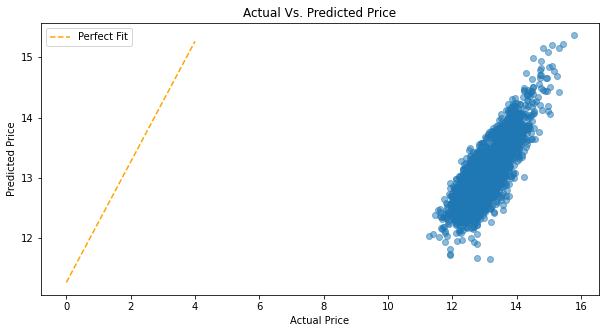

In [86]:
fig, ax = plt.subplots(figsize = (10,5))

perfect_line = np.arange(y_test_log.min(), y_test_log.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test_log, y_hat_test_fin, alpha=0.5)
ax.set_title("Actual Vs. Predicted Price")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
#plt.xlim([0, 3500000])
ax.legend();

 The lower the price of the home, the better the model seems to perform. As the price of the home increase the less linear the model is. This doesn't look like we violate the assumption though.

### Normality Assumption


Text(0.5, 1.0, 'Normality QQPLOT of Residuals')

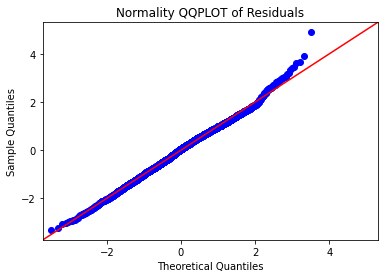

In [87]:
import scipy.stats as stats
residuals = (y_test_log - y_hat_test_fin)
#QQPLOT 
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
plt.title("Normality QQPLOT of Residuals")

This is not normal, we break this assumption.  The outliers of the data are veering off. This supports the earlier concern about the ouliers affecting the modeling effort. Dropping these outliers would help the model.

### Multicollinearity

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Variance Inflation Factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

sqft_lot        137.239768
sqft_living    1440.908390
bathrooms        26.860744
bedrooms         24.645905
yr_built       7382.348064
zipcode        8235.823316
floors           15.333726
cond_num         33.895878
grade_num       116.375693
wa_YES            1.024235
Name: Variance Inflation Factor, dtype: float64

Wow! All the numerical values and two grade categorical values have high VIF.  There is a strong multicollinarity between these features. Dropping some of these features may support the multicollinearity problem. The heatmap did not show these high of multicollinearity among the values.


### Homoescdasticity

Text(0.5, 1.0, 'Test for Homoescdascity')

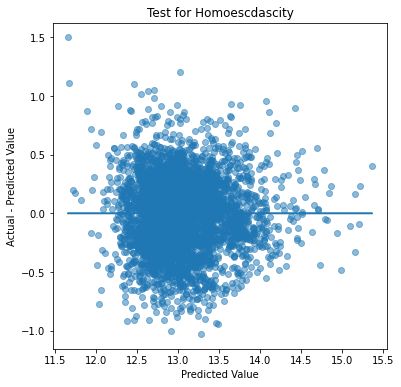

In [89]:
fig, ax = plt.subplots(figsize = (6,6))
#Scatter plot of predictions and residuals
ax.scatter(y_hat_test_fin, residuals, alpha=0.5)
ax.plot(y_hat_test_fin, [0 for i in range(len(X_test_final))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");
ax.set_title("Test for Homoescdascity")

We are definitely violating the homoescdascity here. There is a cone shape and a lot of the outliers are all over. The residuals
do not the same variance. Dropping outliers and scaling the target variable may be a solution to support this.

## Model Feedback

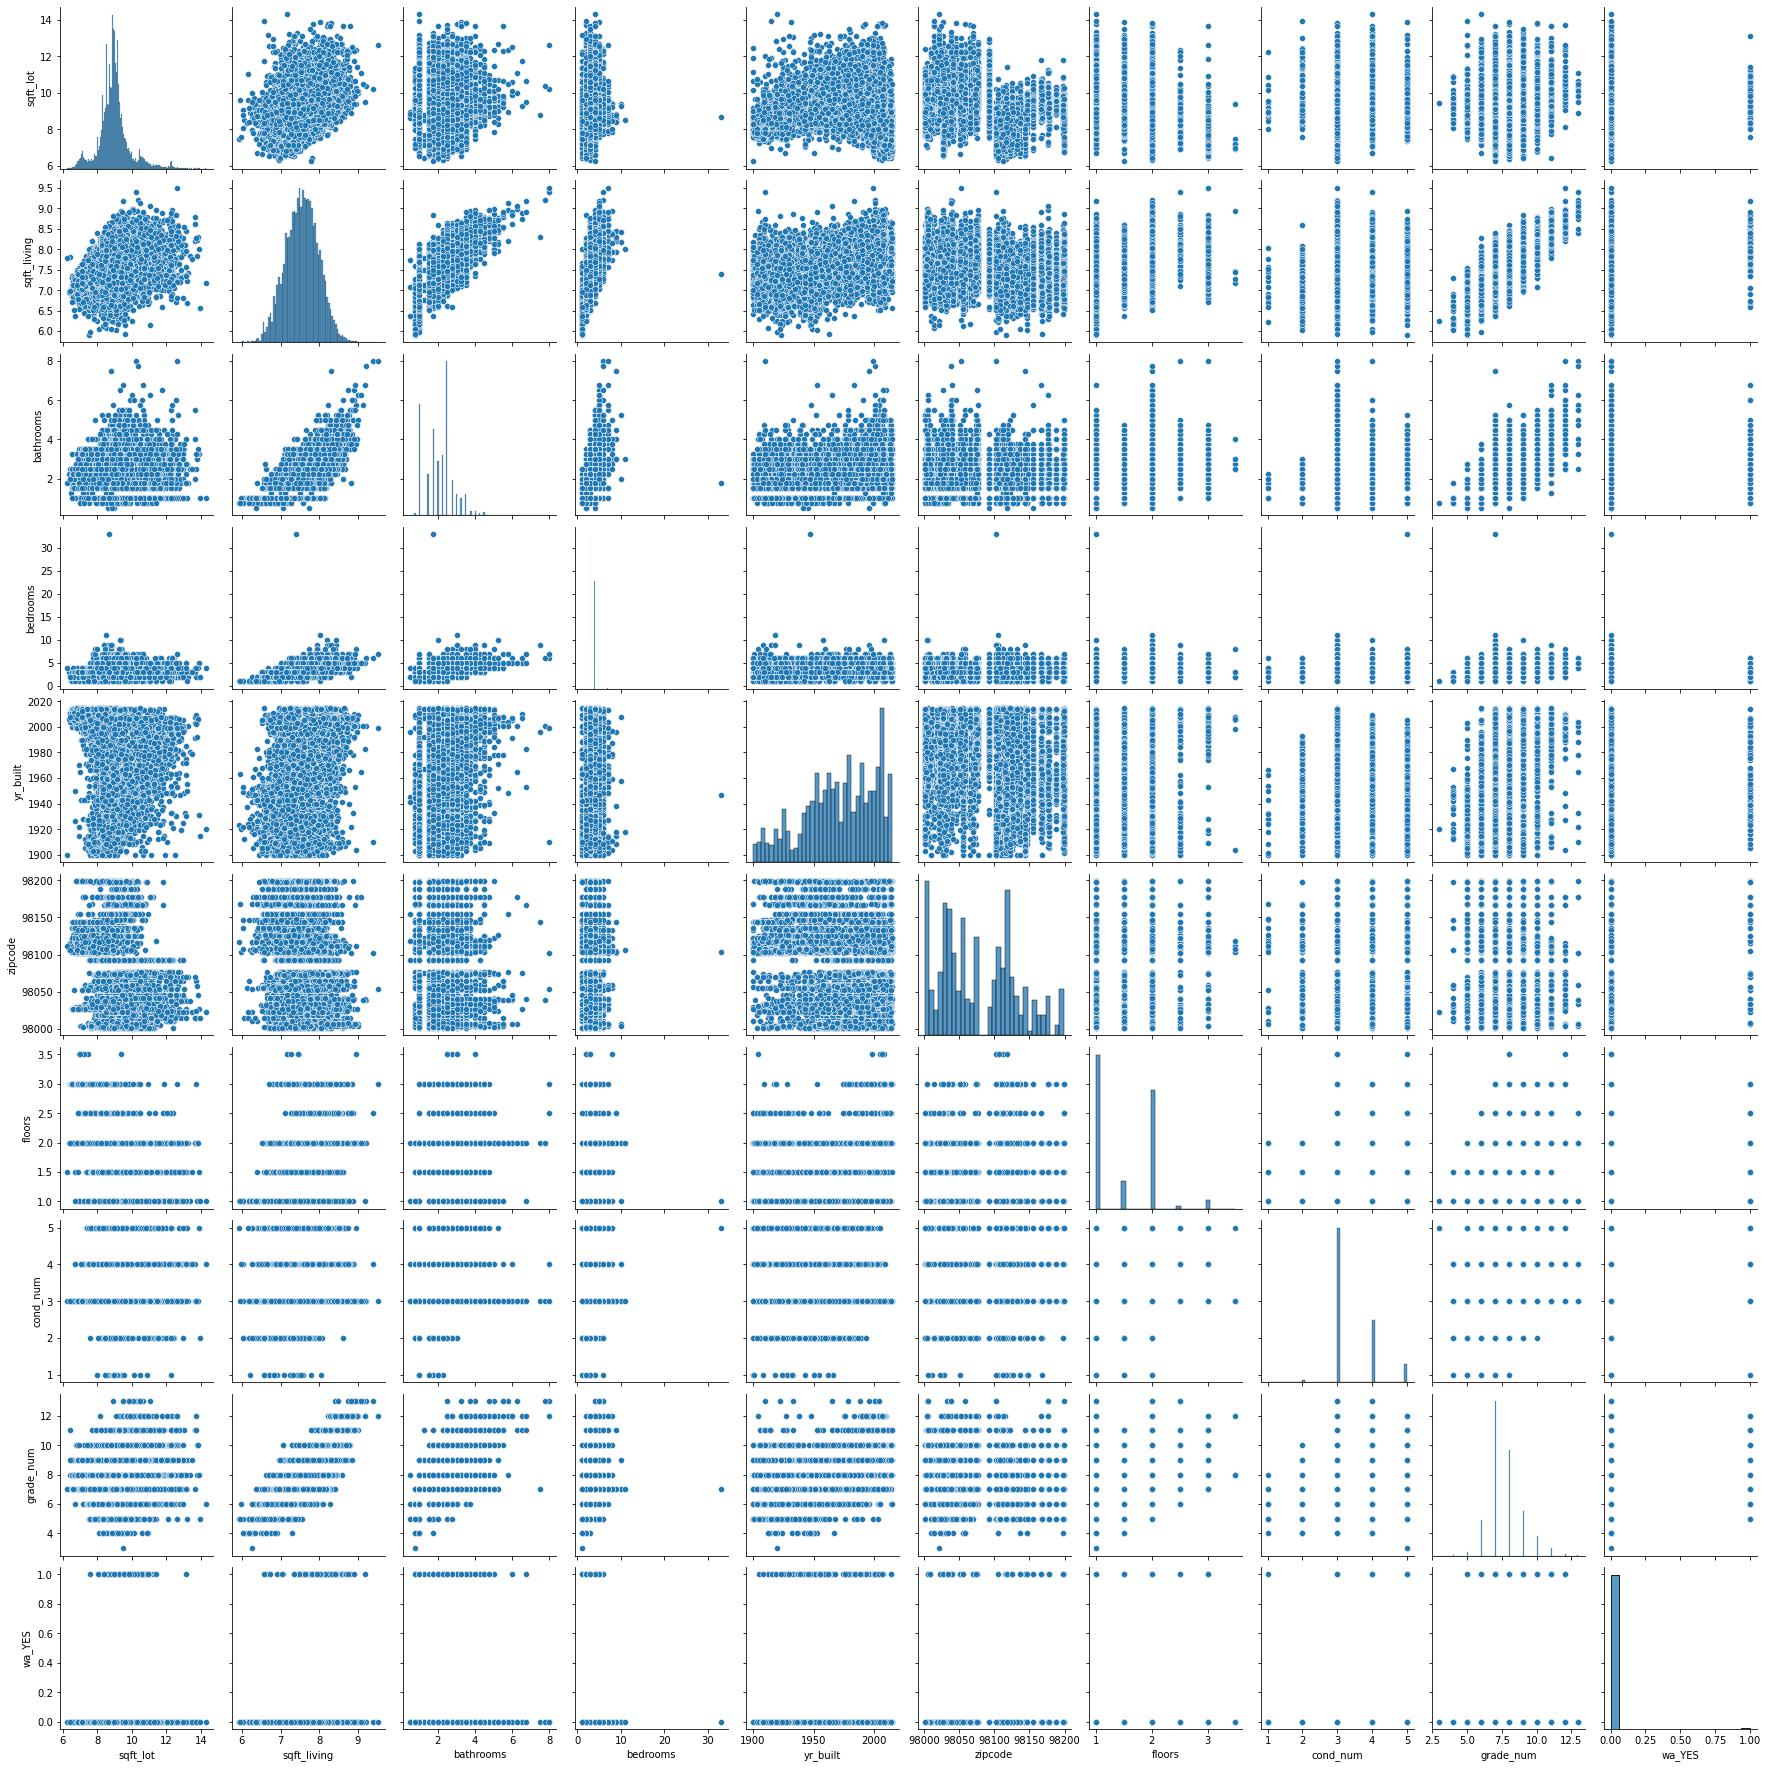

In [90]:
sns.pairplot(X_train_final)

# Model Prediction

A real estate agent would be better useful if it targets speciic focuses. areas versus random houses all over the County.
They could target similar grade and condition houses for improvement.  The grade and contion does not account 
for all of the things that would create a comp but these will the scope for this analysis

In [ ]:
#Make a copy of data (with numbers for grade and condition)
#Pick the 3 different zipcodes with top 6 or below grade and increase to 8 (May not get there, but great goal and falling short is average)
# & and 3 or less condition...to get to 4
#Change grade to 8 for good and change condition to 4
#Put data through same prep process (log to sqft data, OHE waterfront and drop Waterfront No)
#A dashboard of variations for the dial would be the best to see combinations of values
#Plot the zipcode comparing old and new (Look at correlation is higher for .67)
#Show table of old and new comparison values




In [91]:
kc_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,cond_num,grade_num
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,Unk,1955,98178,3,7
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,1951,98125,3,7
5631500400,180000.0,2,1.00,770,10000,1.0,NO,1933,98028,3,6
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,1965,98136,5,7
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,1987,98074,3,8
...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,NO,2009,98103,3,8
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,2014,98146,3,8
1523300141,402101.0,2,0.75,1020,1350,2.0,NO,2009,98144,3,7


In [266]:

#Data has Unknown put in for NaN and Condition and Grade have been transformed already to numbers
#Get  data and copy set and filter data through conditions and grade criteria
imp_df = kc_df.copy()


In [267]:
#Filter the grades meeting the criteria

re_build = imp_df[(imp_df.grade_num <= 6) & (imp_df.cond_num <= 3) ].sort_values(by = "grade_num", ascending= False)
#Group the filtered data by the zipcodes
#Choose zipcodes with the highest that are not Average



In [268]:
 #Filtering with the zipcodes with the highest amount of homes
re_build.groupby(["zipcode"]).count().sort_values(["cond_num"], ascending= False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,cond_num,grade_num
zipcode,,,,,,,,,,
98118,106,106,106,106,106,106,106,106,106,106
98168,95,95,95,95,95,95,95,95,95,95
98146,90,90,90,90,90,90,90,90,90,90
98106,79,79,79,79,79,79,79,79,79,79
98126,68,68,68,68,68,68,68,68,68,68
98178,63,63,63,63,63,63,63,63,63,63
98117,43,43,43,43,43,43,43,43,43,43
98155,39,39,39,39,39,39,39,39,39,39
98125,36,36,36,36,36,36,36,36,36,36


In [269]:
#Creating a list from the top amount of homes 
filt_zcode = [98118,98168,98146,98106,98126]
re_filt = re_build[re_build.zipcode.isin(filt_zcode)]
re_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 3395800155 to 2114700090
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        438 non-null    float64
 1   bedrooms     438 non-null    int64  
 2   bathrooms    438 non-null    float64
 3   sqft_living  438 non-null    int64  
 4   sqft_lot     438 non-null    int64  
 5   floors       438 non-null    float64
 6   waterfront   438 non-null    object 
 7   yr_built     438 non-null    int64  
 8   zipcode      438 non-null    int64  
 9   cond_num     438 non-null    int64  
 10  grade_num    438 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 41.1+ KB


In [270]:
re_filt["grade_num"].value_counts()

6    396
5     37
4      5
Name: grade_num, dtype: int64

In [271]:
re_filt["cond_num"].value_counts()

3    399
2     33
1      6
Name: cond_num, dtype: int64

In [272]:
#Look at how the attributes for the columns changes
re_filt.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode,cond_num,grade_num
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,253603.541096,2.600457,1.147260,1104.963470,7541.929224,1.098174,1937.484018,98133.675799,2.897260,5.892694
std,96721.581601,0.916515,0.356379,385.561368,4602.033460,0.215416,16.480027,22.240518,0.346201,0.344810
min,78000.000000,1.000000,0.500000,380.000000,1642.000000,1.000000,1900.000000,98106.000000,1.000000,4.000000
25%,190000.000000,2.000000,1.000000,830.000000,5085.000000,1.000000,1925.000000,98118.000000,3.000000,6.000000
50%,244250.000000,2.000000,1.000000,1025.000000,6333.500000,1.000000,1942.000000,98126.000000,3.000000,6.000000
75%,300000.000000,3.000000,1.000000,1307.500000,8221.000000,1.000000,1948.000000,98146.000000,3.000000,6.000000
max,795000.000000,6.000000,3.000000,2710.000000,49658.000000,2.000000,2000.000000,98168.000000,3.000000,6.000000


In [276]:
re_filt

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,cond_num,grade_num
id,,,,,,,,,,,
3395800155,250000.0,3,1.00,990,8100,1.0,NO,1949,98146,3,6
8122600145,452000.0,4,2.00,1660,6150,1.0,NO,1945,98126,3,6
8019200925,315000.0,5,1.75,1850,14800,1.5,NO,1937,98168,3,6
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,3,6
798000145,244500.0,2,1.75,1300,14500,1.0,NO,1939,98168,3,6
2113700205,220000.0,4,1.00,1200,6000,1.5,NO,1923,98106,3,6
6620400205,200000.0,2,1.00,1000,6227,1.0,NO,1949,98168,3,6
4303200555,265000.0,2,1.00,770,5160,1.0,NO,1943,98106,3,6
7454000145,122000.0,2,1.00,740,6840,1.0,NO,1942,98126,3,6


In [156]:
#Checking which features are the most correlated with price
re_filt.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode,cond_num,grade_num
price,1.000000,0.167822,0.201698,0.307478,-0.172134,0.176807,-0.237924,-0.339209,0.133077,0.248845
bedrooms,0.167822,1.000000,0.374962,0.627679,-0.007657,0.448324,0.032831,0.006204,0.129963,0.247798
bathrooms,0.201698,0.374962,1.000000,0.525424,-0.040053,0.224834,-0.029989,-0.048096,0.025534,0.142854
sqft_living,0.307478,0.627679,0.525424,1.000000,0.049063,0.440787,-0.039116,0.062236,0.129319,0.296250
sqft_lot,-0.172134,-0.007657,-0.040053,0.049063,1.000000,0.043095,0.120375,0.391710,-0.128576,-0.041478
floors,0.176807,0.448324,0.224834,0.440787,0.043095,1.000000,-0.130731,0.022898,0.104872,0.080536
yr_built,-0.237924,0.032831,-0.029989,-0.039116,0.120375,-0.130731,1.000000,0.247452,0.022373,-0.021847
zipcode,-0.339209,0.006204,-0.048096,0.062236,0.391710,0.022898,0.247452,1.000000,-0.038811,-0.051693
cond_num,0.133077,0.129963,0.025534,0.129319,-0.128576,0.104872,0.022373,-0.038811,1.000000,0.290825
grade_num,0.248845,0.247798,0.142854,0.296250,-0.041478,0.080536,-0.021847,-0.051693,0.290825,1.000000


In [274]:
# Change the grade and conditions to the goal
re_new = re_filt.copy()
re_new["grade_num"] = 8
re_new["cond_num"] =  4

In [275]:
#Review the dataframe
re_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,cond_num,grade_num
id,,,,,,,,,,,
3395800155,250000.0,3,1.00,990,8100,1.0,NO,1949,98146,4,8
8122600145,452000.0,4,2.00,1660,6150,1.0,NO,1945,98126,4,8
8019200925,315000.0,5,1.75,1850,14800,1.5,NO,1937,98168,4,8
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,4,8
798000145,244500.0,2,1.75,1300,14500,1.0,NO,1939,98168,4,8


Replace all conditions with "Average" and replace all grades with "8 Good".  Would like to think this is a good goal for the houses to get to.  

In [277]:
#Split the data 

X_re_new = re_new.drop("price", axis = 1)
y_re_new = re_new["price"]


In [278]:
#Creating a list of the features to transform

#Features going through log-transformaiton
log_feat = ["sqft_lot", "sqft_living"]
#Features that will not be transformed
discrete_col= ["bathrooms","bedrooms","yr_built","zipcode","floors", "cond_num", "grade_num"]
#OHE features
categoricals = ['waterfront']


In [279]:
categoricals
cat_cols_re = []
for col in categoricals:
    cat_cols_re += [f"{col[0:2]}_{cat}" for cat in list(X_train[col].unique())]


In [280]:
cat_cols_re


['wa_NO', 'wa_Unk', 'wa_YES']

In [281]:
#Reshape Y training data to support modeling without error for single arrays

y_array_re = np.array(y_re_new)
y_re = y_array_re.reshape(-1,1)



In [282]:
#  import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

# Instantiate transformers
#log_transformer = FunctionTransformer(np.log, validate=True)
#log_transformer_y = FunctionTransformer(np.log, validate=True)
# OHE instantiation. Will drop a value after the concatenation
#ohe = OneHotEncoder(sparse=False) 

#Test Transformation
X_re_log = log_transformer.transform(X_re_new[log_feat])
X_re_ohe = ohe.transform(X_re_new[categoricals])
y_re_log = log_transformer_y.transform(y_re)


#Concatenate transformed train data. Keeping the same index as the original training data

X_re_pred = pd.concat([
        pd.DataFrame(X_re_log , columns= log_feat, index=X_re_new.index),
        pd.DataFrame(X_re_new[discrete_col], columns= discrete_col, index=X_re_new.index),
        pd.DataFrame(X_re_ohe, columns = cat_cols_re, index=X_re_new.index),
        ], axis=1)


#Converting the original y log array to a series with the original shape and an index
y_re_act_log = pd.Series(data=y_re_log.reshape((y_re_new.shape)), index=y_re_new.index)



Now

In [283]:
#Ref Linear Regression Model 20
final_lin = LinearRegression(normalize= True)

# Fit the model on X_train_final and y_train
final_lin.fit(X_train_final, y_train)

LinearRegression(normalize=True)

In [284]:
LinearRegression()

LinearRegression()

In [285]:
X_re_pred.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
       'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_NO', 'wa_Unk',
       'wa_YES'],
      dtype='object')

In [286]:
X_re_pred.drop(['wa_NO', 'wa_Unk'], inplace= True, axis = 1)

In [287]:
X_train_final.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
       'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_YES'],
      dtype='object')

In [309]:
#Predicted Home Values
re_pred = final_lin.predict(X_re_pred)
re_pred = re_pred.round(-3)
re_pred

array([482000., 669000., 662000., 596000., 660000., 614000., 508000.,
       497000., 490000., 708000., 621000., 641000., 471000., 557000.,
       463000., 494000., 707000., 551000., 834000., 557000., 667000.,
       570000., 468000., 572000., 618000., 605000., 686000., 604000.,
       460000., 643000., 498000., 691000., 691000., 744000., 550000.,
       657000., 461000., 555000., 466000., 456000., 375000., 620000.,
       593000., 688000., 656000., 635000., 421000., 533000., 633000.,
       684000., 652000., 478000., 621000., 519000., 483000., 444000.,
       596000., 551000., 618000., 510000., 489000., 605000., 594000.,
       502000., 593000., 635000., 522000., 535000., 635000., 499000.,
       627000., 495000., 676000., 477000., 477000., 754000., 487000.,
       573000., 505000., 465000., 422000., 592000., 714000., 639000.,
       532000., 522000., 645000., 422000., 439000., 558000., 558000.,
       480000., 488000., 512000., 500000., 583000., 585000., 585000.,
       529000., 5490

In [ ]:
#Create dataframe to show old and new
#Old: price reg, condition, grade
#New: price reg, condition, grade
#Plot bar graph

In [310]:
re_new = re_new.rename(columns={'cond_num': "new_cond",'grade_num': "new_grade" })

In [311]:
re_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,new_cond,new_grade
id,,,,,,,,,,,
3395800155,250000.0,3,1.00,990,8100,1.0,NO,1949,98146,4,8
8122600145,452000.0,4,2.00,1660,6150,1.0,NO,1945,98126,4,8
8019200925,315000.0,5,1.75,1850,14800,1.5,NO,1937,98168,4,8
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,4,8
798000145,244500.0,2,1.75,1300,14500,1.0,NO,1939,98168,4,8
2113700205,220000.0,4,1.00,1200,6000,1.5,NO,1923,98106,4,8
6620400205,200000.0,2,1.00,1000,6227,1.0,NO,1949,98168,4,8
4303200555,265000.0,2,1.00,770,5160,1.0,NO,1943,98106,4,8
7454000145,122000.0,2,1.00,740,6840,1.0,NO,1942,98126,4,8


In [312]:
#Concatenating the dataframe to show original and new predictions

X_comp = pd.concat([
        re_filt,
        pd.DataFrame(re_pred ,columns= ["Pred_Home_Value"], index=re_new.index),
        re_new[["new_cond","new_grade"]]], axis=1)

In [313]:
X_comp

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,cond_num,grade_num,Pred_Home_Value,new_cond,new_grade
id,,,,,,,,,,,,,,
3395800155,250000.0,3,1.00,990,8100,1.0,NO,1949,98146,3,6,482000.0,4,8
8122600145,452000.0,4,2.00,1660,6150,1.0,NO,1945,98126,3,6,669000.0,4,8
8019200925,315000.0,5,1.75,1850,14800,1.5,NO,1937,98168,3,6,662000.0,4,8
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,3,6,596000.0,4,8
798000145,244500.0,2,1.75,1300,14500,1.0,NO,1939,98168,3,6,660000.0,4,8
2113700205,220000.0,4,1.00,1200,6000,1.5,NO,1923,98106,3,6,614000.0,4,8
6620400205,200000.0,2,1.00,1000,6227,1.0,NO,1949,98168,3,6,508000.0,4,8
4303200555,265000.0,2,1.00,770,5160,1.0,NO,1943,98106,3,6,497000.0,4,8
7454000145,122000.0,2,1.00,740,6840,1.0,NO,1942,98126,3,6,490000.0,4,8


In [314]:
X_comp = X_comp.rename(columns={"price":"org_value",'cond_num': "org_cond",'grade_num': "org_grade", "Pred_Home_Value":"pred_value" })

In [315]:
X_comp.head()

,org_value,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,org_cond,org_grade,pred_value,new_cond,new_grade
id,,,,,,,,,,,,,,
3395800155,250000.0,3,1.00,990,8100,1.0,NO,1949,98146,3,6,482000.0,4,8
8122600145,452000.0,4,2.00,1660,6150,1.0,NO,1945,98126,3,6,669000.0,4,8
8019200925,315000.0,5,1.75,1850,14800,1.5,NO,1937,98168,3,6,662000.0,4,8
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,3,6,596000.0,4,8
798000145,244500.0,2,1.75,1300,14500,1.0,NO,1939,98168,3,6,660000.0,4,8


<AxesSubplot:xlabel='id'>

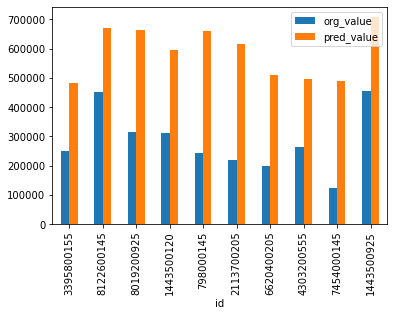

In [317]:
#Filtering Graph by value
#New_Comp [["Org_Cond"]] != "Average"
X_comp[["org_value","pred_value"]].head(10).plot(kind = "bar")

In [321]:
X_comp["zipcode"].value_counts()

98118    106
98168     95
98146     90
98106     79
98126     68
Name: zipcode, dtype: int64

In [345]:
# difference in price

X_comp["value_diff"] = X_comp["pred_value"] - X_comp["org_value"]
X_comp

,org_value,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,org_cond,org_grade,pred_value,new_cond,new_grade,value_diff
id,,,,,,,,,,,,,,,
3395800155,250000.0,3,1.00,990,8100,1.0,NO,1949,98146,3,6,482000.0,4,8,232000.0
8122600145,452000.0,4,2.00,1660,6150,1.0,NO,1945,98126,3,6,669000.0,4,8,217000.0
8019200925,315000.0,5,1.75,1850,14800,1.5,NO,1937,98168,3,6,662000.0,4,8,347000.0
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,3,6,596000.0,4,8,286000.0
798000145,244500.0,2,1.75,1300,14500,1.0,NO,1939,98168,3,6,660000.0,4,8,415500.0
2113700205,220000.0,4,1.00,1200,6000,1.5,NO,1923,98106,3,6,614000.0,4,8,394000.0
6620400205,200000.0,2,1.00,1000,6227,1.0,NO,1949,98168,3,6,508000.0,4,8,308000.0
4303200555,265000.0,2,1.00,770,5160,1.0,NO,1943,98106,3,6,497000.0,4,8,232000.0
7454000145,122000.0,2,1.00,740,6840,1.0,NO,1942,98126,3,6,490000.0,4,8,368000.0


In [346]:
def filt_zcode(zipcode):
    zcode_filt = X_comp[X_comp["zipcode"] == zipcode] 
    zcode_filt = zcode_filt.sort_values(["yr_built"], ascending= True)
    return zcode_filt

In [349]:
zip18 = graph_zcode(98118)
zip18.head()

,org_value,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,org_cond,org_grade,pred_value,new_cond,new_grade,value_diff
id,,,,,,,,,,,,,,,
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,3,6,596000.0,4,8,286000.0
1443500925,455000.0,2,1.00,1140,11480,1.0,NO,1907,98118,3,6,708000.0,4,8,253000.0
4356200120,248000.0,1,1.00,790,12000,1.0,NO,1918,98118,3,6,621000.0,4,8,373000.0
4006000281,227000.0,3,1.75,2380,12681,1.0,NO,1918,98118,1,6,834000.0,4,8,607000.0
9331800580,257000.0,2,1.00,1000,3700,1.0,NO,1929,98118,3,6,605000.0,4,8,348000.0


In [348]:
zip18.sort_values(["yr_built"], ascending= True)

,org_value,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,org_cond,org_grade,pred_value,new_cond,new_grade,value_diff
id,,,,,,,,,,,,,,,
1703400585,325000.0,3,2.00,2330,4950,1.5,Unk,1900,98118,3,6,949000.0,4,8,624000.0
7129302095,265000.0,3,1.00,1122,6554,1.5,NO,1900,98118,3,5,723000.0,4,8,458000.0
3332000615,310000.0,3,1.00,1330,3740,1.5,NO,1903,98118,3,6,746000.0,4,8,436000.0
3332000195,167500.0,3,1.00,760,3090,1.0,NO,1903,98118,2,5,653000.0,4,8,485500.0
3330500705,197500.0,3,1.00,980,3090,1.5,NO,1903,98118,3,6,698000.0,4,8,500500.0
3330500335,325000.0,2,1.00,1010,6180,1.0,NO,1903,98118,3,6,714000.0,4,8,389000.0
3332000615,389000.0,3,1.00,1330,3740,1.5,Unk,1903,98118,3,6,746000.0,4,8,357000.0
7950302345,345000.0,3,1.00,1010,3060,1.5,NO,1904,98118,3,6,698000.0,4,8,353000.0
1703401110,292000.0,2,1.00,880,5500,1.0,NO,1904,98118,3,6,688000.0,4,8,396000.0


In [ ]:
#Plot the average oz all zipcodes knowing difference
#plot lowest and higest of 5 with 10 numbers


In [ ]:
fig, ax = plt.subplots()

p1 = ax.bar(ind, menMeans, width, yerr=menStd, label='Men')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, labels=['G1', 'G2', 'G3', 'G4', 'G5'])
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

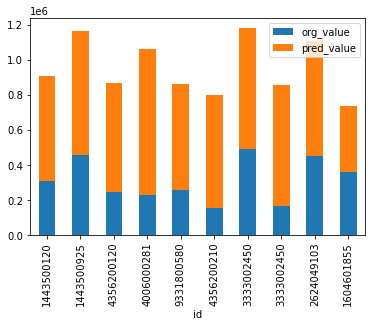

In [352]:
zip18[["org_value","pred_value"]].head(10).plot(kind = "bar", stacked = True)

#title
#legend
#x axis
#y axis
#plot the differe

## Invert Log Transformation 

In [240]:
#For explanational purposes inversing the values with log apply
import math

#Y pred inverse log
y_pred_no_log = np.exp(y_hat_test_fin)
y_pred_no_log = y_pred_no_log.round(2)
y_pred_no_log


array([807435.97, 239940.92, 377907.52, ..., 492818.19, 492192.68,
       406997.63])